# PCA on Facial Recognition Data set (inbiult)

In [1]:
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import fetch_lfw_people
import warnings

In [4]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=DeprecationWarning)
    faces = fetch_lfw_people(min_faces_per_person=40)

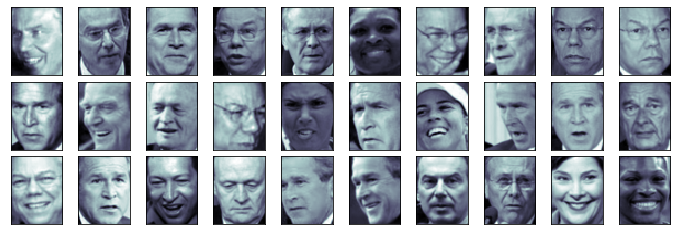

In [5]:
#fig=plt.subplot(3,10,figsize=(12,4))

# plot images
fig, axes = plt.subplots(3, 10, figsize=(12, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(faces.data[i].reshape(62, 47), cmap='bone')

# Applying PCA on the dataset
To produce a quick demo, we simply use scikit-learn’s PCA module to perform dimension reduction on the face dataset and select 150 components(eigenfaces) in order to maximize the variance of the dataset.

In [6]:
from sklearn.decomposition import PCA

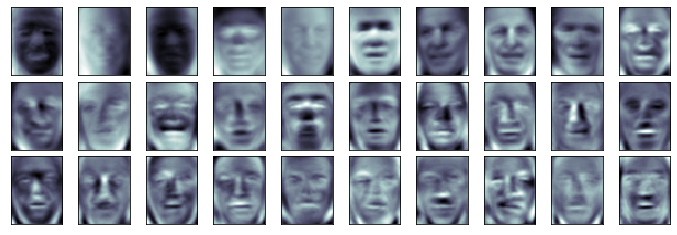

In [7]:
faces_pca = PCA(n_components=150, svd_solver='randomized').fit(faces.data)
# Plot principal components
fig, axes = plt.subplots(3, 10, figsize=(12, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(faces_pca.components_[i].reshape(62, 47), cmap='bone')

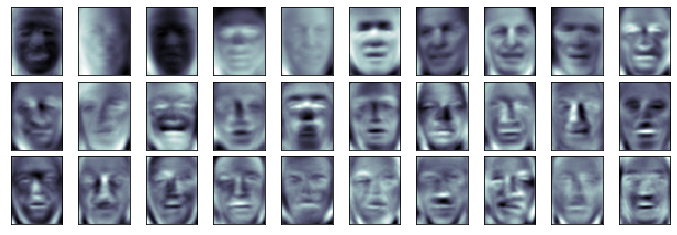

In [8]:
faces_pca = PCA(n_components=150, svd_solver='randomized').fit(faces.data)
# Plot principal components
fig, axes = plt.subplots(3, 10, figsize=(12, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(faces_pca.components_[i].reshape(62, 47), cmap='bone')

# Now we will use the principal components to form a projected image of faces and compare it with the original dataset.

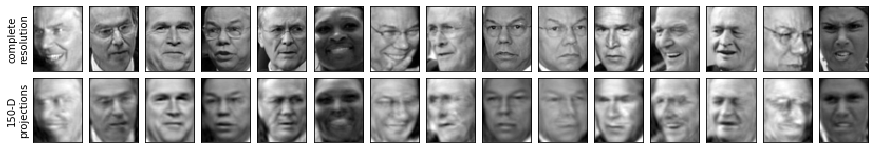

In [9]:
components = faces_pca.transform(faces.data)
projected = faces_pca.inverse_transform(components)
# Plot the results
fig, ax = plt.subplots(2, 15, figsize=(15, 2.5),
 subplot_kw={'xticks':[], 'yticks':[]},
 gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(15):
 ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
 ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
 
ax[0, 0].set_ylabel('complete\nresolution')
ax[1, 0].set_ylabel('150-D\nprojections');

# As we can see the principal features extracted using PCA capture most of the variance in the dataset and thus, the projections formed by these 150 principal components are quite close to images in the original dataset.